# 25 days before lockdown vs 25 days after lockdown Air Quality

In [20]:
import pandas as pd
df = pd.read_csv("C:\\Users\\Prasun\\Desktop\\jadavpur,-kolkata, india-air-quality.csv")  #reading data
df

,date,pm25,pm10,o3,no2,so2,co
0,2020/11/1,40,36,10,14,3,4
1,2020/11/2,60,100,30,19,7,7
2,2020/11/3,117,136,26,23,6,9
3,2020/11/4,176,145,18,31,5,13
4,2020/11/5,182,125,26,33,7,13
...,...,...,...,...,...,...,...
336,2019/12/29,161,,,,,
337,2020/10/26,,81,41,27,7,10
338,2020/9/27,,67,9,11,2,6
339,2019/12/31,,142,5,25,2,16


In [21]:
df.columns                                      #correcting each column name by removing extra space 

df= df.rename(columns = {" pm25": "pm25", 
                         " pm10":"pm10",
                         " o3": "o3",
                         ' no2' : 'no2',
                         ' so2' : 'so2',
                         ' co' : 'co'})

df.columns

Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co'], dtype='object')

In [22]:
df.isnull().sum()  #checking null value

date    0
pm25    0
pm10    0
o3      0
no2     0
so2     0
co      0
dtype: int64

In [74]:
df['date'] = pd.to_datetime(df.date)

df25 = df.loc[(df['date'] > '2020-03-22') & (df['date']  < '2020-04-17')]

df25 = df25.sort_values(by = 'date')
df25.shape

(25, 7)

In [25]:
df.replace(' ', '0', inplace=True)
df


,date,pm25,pm10,o3,no2,so2,co
340,2019-12-02,0,110,0,32,1,16
310,2019-12-03,168,88,28,20,6,10
311,2019-12-04,146,103,8,21,2,10
312,2019-12-05,156,104,11,24,11,16
313,2019-12-06,134,84,4,23,3,15
...,...,...,...,...,...,...,...
2,2020-11-03,117,136,26,23,6,9
3,2020-11-04,176,145,18,31,5,13
4,2020-11-05,182,125,26,33,7,13
5,2020-11-06,170,122,8,23,3,8


In [77]:
mast_life = (df['date'] >= '2020-02-27') & (df['date']  < '2020-03-23')

pre25 = df.loc[mast_life]
pre25.shape

(25, 7)

In [55]:
pre25.shape

(25, 7)

In [76]:
mask_life = (df['date'] >= '2020-03-23') & (df['date']  < '2020-04-17')

post25 = df.loc[mask_life]
post25.shape

(25, 7)

In [46]:
post25.shape

(25, 7)

In [56]:
df21 = df.loc[df['date'] > '2020-03-24']

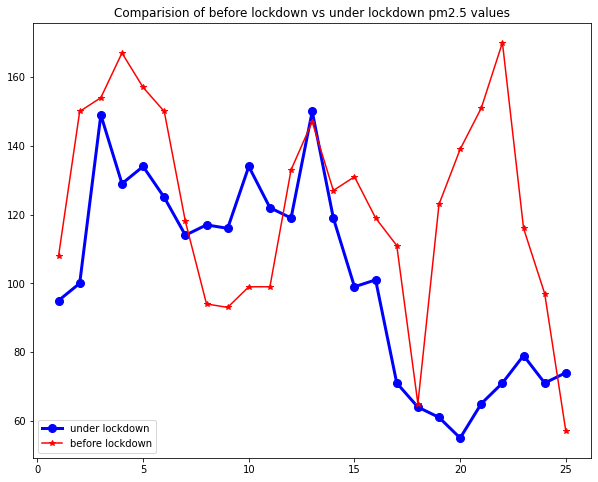

In [82]:
import matplotlib.pyplot as plt

dates = df25['date']
pm25_l = post25['pm25']
pm25_l = [int(i) for i in pm25_l]


pm25_n = pre25['pm25']
pm25_n = [int(i) for i in pm25_n]

plt.figure(figsize=(10,8))

length = [i for i in range(1,len(dates)+1)]

plt.plot(length,pm25_l,color='blue',label='under lockdown',linewidth=3,marker="o", markersize=8)
plt.plot(length,pm25_n,color='red',label='before lockdown',marker="*")
plt.legend()
plt.title('Comparision of before lockdown vs under lockdown pm2.5 values')
plt.show()

In [83]:
df25['pm25'] = [int(i) for i in df25['pm25']]  #On which date pm2.5 value was minimum in kanpur under lockdown
print(df25[df25.pm25 == df25.pm25.min()]) 

          date  pm25 pm10   o3 no2 so2  co
199 2020-04-11    55   53   22   3   2   3
